# Classifying Breast Cancer Tumor Categories
<p align="center" width="100%">
<img src="image.png" alt="breast cancer logo" height="400" width="800"/>
</p>

# Business Understanding 
Breast cancer is the most common cancer in women, accounting for 1 in 4 cancers diagnosed in the U.S. and causing over 40,000 deaths each year, and it is the second leading cause of cancer death among women, after lung cancer. Breast Cancer occurs as a result of abnormal growth of cells in the breast tissue, commonly referred to as a Tumor. A tumor does not mean cancer - tumors can be benign (not cancerous), pre-malignant (pre-cancerous), or malignant (cancerous).

Early detection of breast cancer is key and can help improve the chances of survival. A research shows that the doctors are only able to detect 70–80% accurately which might cause a serious threat to the undiagnosed patients suffering from breast cancer. A hospital wants to create an automated sytem to detect if the cancer diagnosed is malign or benignant, using information such as their mean radius, mean compactness, worst area etc. 

<strong> Objective </strong>

> The goal is to classify whether the breast cancer is benign or malignant 

Classification model built will be used by the hospital to determine if the patient has malignant cancer or not and this could help in early diagnosis of Breast cancer that can improve the prognosis and chance of survival significantly, as it can promote timely clinical treatment to patients.Further accurate classification of benign tumors can also prevent patients undergoing unnecessary treatments.

## Data Understanding

The dataset consists of several human cell sample records, each of which contains the values of a set of characteristics of the nucleus. Here is a **[link](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)** to the dataset. It is available as machine learning repository maintained by the University of California, Irvine.

<strong>Attribute Information:</strong>

- ID number
- Diagnosis (M = malignant, B = benign)
<strong>Features computed from each cell nucleus:</strong>

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)
<br>

<strong>Expected outcome </strong>

Given breast cancer results from breast fine-needle aspiration (FNA) test (is a quick and simple procedure to perform, which removes some fluid or cells from a breast lesion or cyst (a lump, sore, or swelling) with a fine needle similar to a blood sample needle). The features have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumor is benign or malignant.
* 1 = Malignant (Cancerous) - Present
* 0 = Benign (Not Cancerous) -Absent

#### Import necessary libraries 

In [112]:
#Import libraries
import numpy as np         
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV 
import warnings
warnings.filterwarnings('ignore')

#### Load Dataset

In [74]:
# Read the file "data.
df = pd.read_csv('data/data.csv', index_col=False)

In [43]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


You can check the number of cases, as well as the number of fields, using the shape method, as shown below.

In [6]:
df.shape

(569, 33)

The dataset has 569 records, each with 33 columns.

In [7]:
# Review data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

- Most of the columns are of numerical type "Float" except for id -integer type our target variable called <strong> Diagnosis </strong> -object data type. We can use one hot encoding to convert the object data type to numerical data type as the machine learning algorithms requires numerical inputs and not strings.
- There are 2 redundant columns: id and "Unnamed: 32" in the dataset with missing values, we can drop these columns.

In [75]:
#Drop unnecessary columns 
df.drop('id', axis =1, inplace=True)
df.drop('Unnamed: 32', axis=1, inplace=True)
#df.head()

#### Check for missing variables

In [11]:
df.isnull().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

There are no missing values in the dataset

# Exploratory Data Analysis

Next step involves taking a closer look at attributes and data values.

#### Descriptive statistics
Summary statistics are measurements meant to describe data. 

In [12]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


We'll check the distribution of our target variable

In [14]:
diag_gr = df.groupby('diagnosis', axis=0)
pd.DataFrame(diag_gr.size(), columns=['# of observations'])

,# of observations
diagnosis,
B,357
M,212


* M - Malignant(prescence of cancer)
* B - Benign(absence of cancer)

We can plot a graph to check the distribution of the target variable 

[Text(0.5, 1.0, 'Distribution of Diagnosis')]

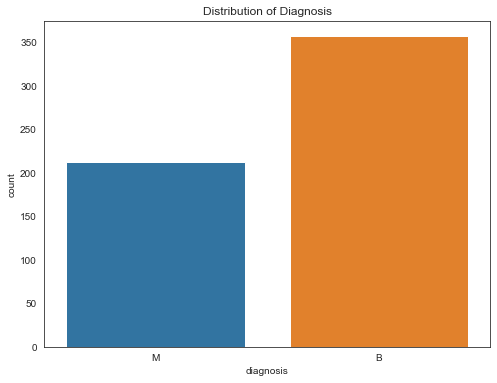

In [22]:
#lets get the frequency of cancer diagnosis
sns.set_style("white")
sns.set_context({"figure.figsize": (8, 6)})
sns.countplot(df['diagnosis'],label='Count').set(title='Distribution of Diagnosis')

There is a slight imbalance in the data. But it is fine in this case

In [ ]:
for col in df.drop("diagnosis", axis=1).columns:
    plt.figure(figsize=(7,5))
    sns.distplot(df[col])
    plt.title(f"{col}", size=15)
    plt.show()

In [44]:
df_mean=df.iloc[:,1:11]
df_se=df.iloc[:,11:22]
df_worst=df.iloc[:,23:]

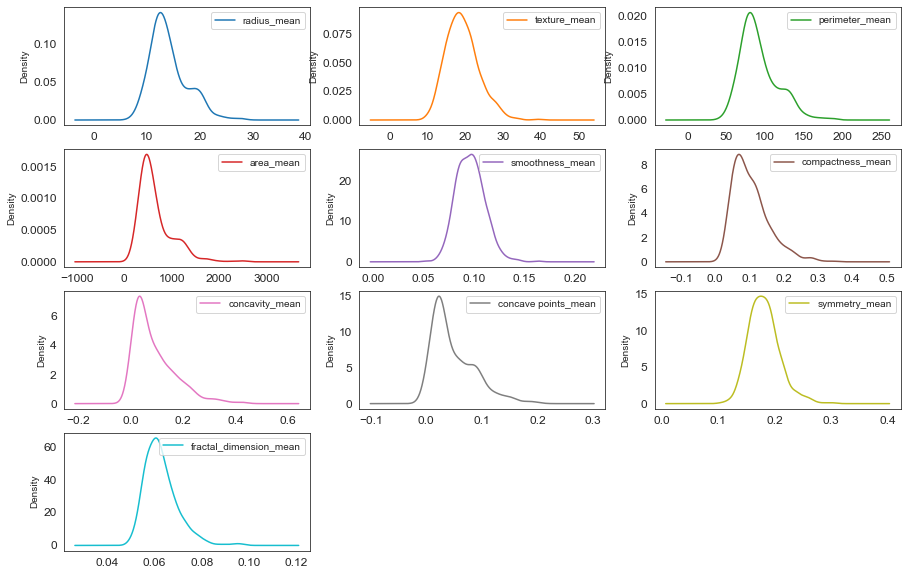

In [33]:
#Density Plots
plt = df_mean.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False, fontsize=12, figsize=(15,10))


### Density plots `_se` suffix designition

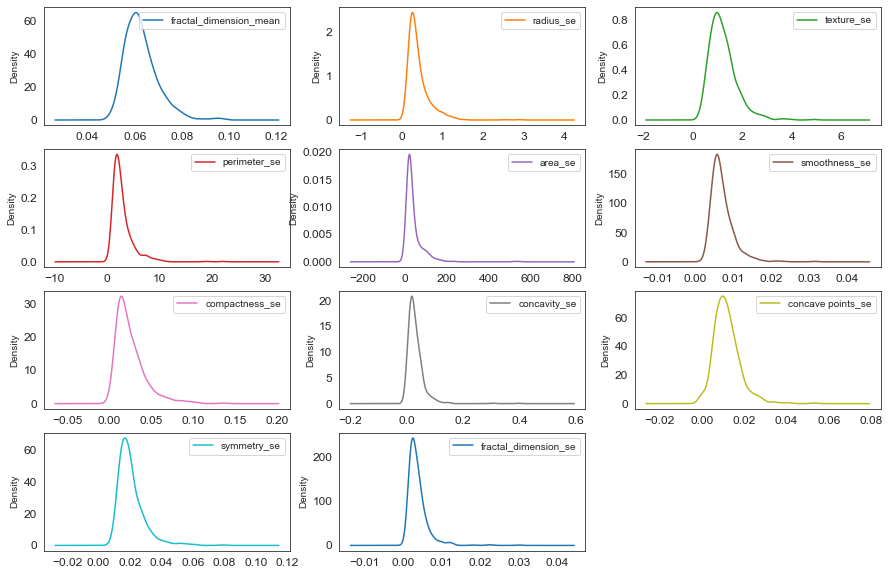

In [22]:
#Density Plots
plt = df_se.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                    sharey=False, fontsize=12, figsize=(15,10))


### Density plot `_worst` suffix designition

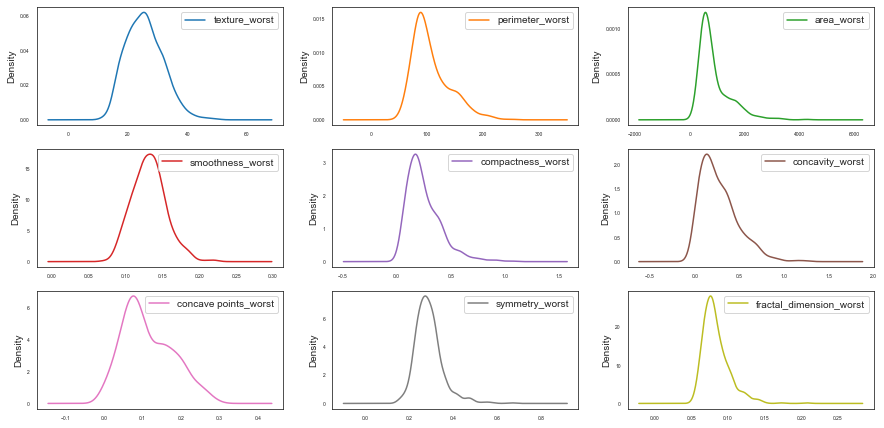

In [23]:
#Density Plots
plt = df_worst.plot(kind= 'kde', subplots=True, layout=(4,3), sharex=False, sharey=False, 
                    fontsize=5, figsize=(15,10))


### Observation
>We can see that perhaps the attributes perimeter,radius, area, concavity, compactness may have an exponential distribution( ). We can also see that perhaps the texture and smooth and symmetry attributes may have a Gaussian or nearly Gaussian distribution. This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.

### Correlation matrix

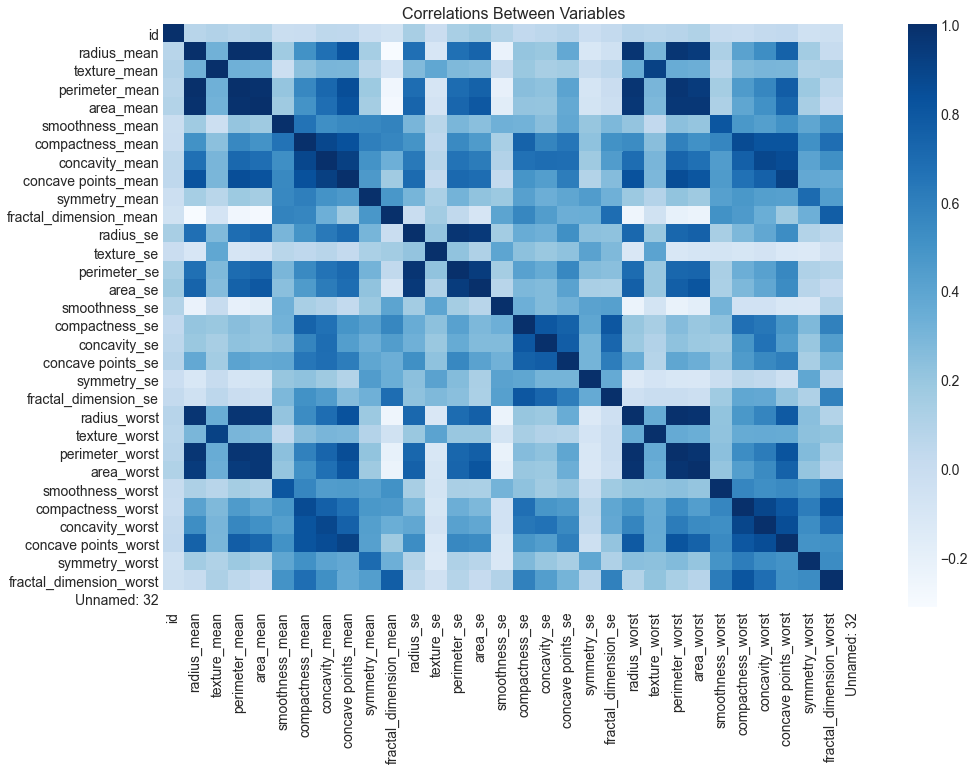

In [50]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap="Blues")
plt.title("Correlations Between Variables", size=16)
plt.show()

We can clearly see that several columns are very highly correlated, causing multicollinearity among independent variables.

### Observation:
We can see strong positive relationship exists with mean values paramaters between **1** to **0.75**.
* The mean area of the tissue nucleus has a strong positive correlation with mean values of radius and parameter;
* Some paramters are moderately positive corrlated (r between 0.5-0.75)are concavity and area, concavity and perimeter etc
* Likewise, we see some strong negative correlation between fractal_dimension with radius, texture, parameter mean values.
    

In [ ]:

# from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# # creating dummies for gender
# df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
  
# # the independent variables set
# X = df.drop(["diagnosis"], axis = 1)
  
# # VIF dataframe
# vif_data = pd.DataFrame()
# vif_data["feature"] = X.columns
  
# # calculating VIF for each feature
# vif_data["VIF"] = [variance_inflation_factor(X.values, i)
#                           for i in range(len(X.columns))]
  
# print(vif_data)

In [77]:
# Remove highly correlated features
X_copy = df.drop(["diagnosis"], axis = 1)
corr_matrix = X_copy.corr().abs() 

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)
to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.85)]
df_copy = df.drop(to_drop, axis = 1)

In [78]:
df_copy.columns

Index(['diagnosis', 'smoothness_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'texture_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'area_worst',
       'smoothness_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

In [79]:
df_copy.shape

(569, 18)

In [80]:
X = df_copy.drop(["diagnosis"], axis = 1)
y = df["diagnosis"]

### Caterogical variable Encoding

In [81]:
#transform the class labels from their original string representation (M and B) into integers
#mapping malignant to 1, and benign to 0
y = y.map({'M':1,'B':0})

> *After encoding the labels, , the malignant tumors are now represented as class 1(i.e prescence of cancer) and the benign tumors are represented as class 0 (no cancer)**


### Split data into training and test sets

In [82]:
from sklearn.model_selection import train_test_split

##Split data set in train 70% and test 30%
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((398, 17), (398,), (171, 17), (171,))

### Feature Standardization

* As observed in EDA, the data has differing distributions which may have an impact on the most ML algorithms. Most machine learning and optimization algorithms behave much better if features are on the same scale.

We can use sklearn to scale and transform the data

In [84]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Baseline model

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# train our model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [101]:
# A function get a confusion matrix, classification report and accuracy score for logistic regression
def report(y_test, pred, title):
    print(classification_report(y_test, pred))
    print(f"Accuracy Score: {accuracy_score(y_test, pred)}")

In [104]:
def matrix(y_test,pred, title):
    ax = plt.subplot()
    cm = confusion_matrix(y_test, pred)
    print(sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=ax));
    ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels'); 
    ax.set_title(title);

#### Train data results - Logistic Regression

In [106]:
# predict the model on train data 
pred_log_reg_train = log_reg.predict(X_train)

In [107]:
report(y_train, pred_log_reg_train, 'Confusion Matrix - Logistic Regression')

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       249
           1       0.99      0.96      0.98       149

    accuracy                           0.98       398
   macro avg       0.98      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398

Accuracy Score: 0.9824120603015075


AxesSubplot(0.08,0.125;0.696x0.755)


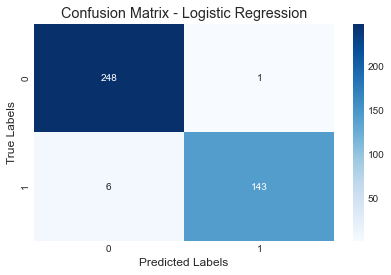

In [108]:
matrix(y_train, pred_log_reg_train, 'Confusion Matrix - Logistic Regression')

#### Test data results - Logistic Regression

In [ ]:
# predict the model on test data 
pred_log_reg_test = log_reg.predict(X_test)

In [102]:
report(y_test, pred_log_reg_t, 'Confusion Matrix - Logistic Regression')

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

Accuracy Score: 0.9766081871345029


AxesSubplot(0.08,0.125;0.696x0.755)


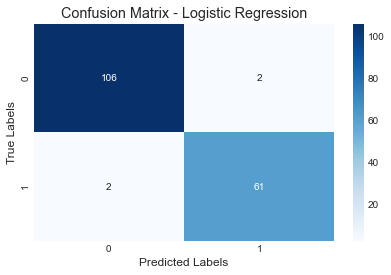

In [105]:
matrix(y_test, pred_log_reg_test, 'Confusion Matrix - Logistic Regression')

In [129]:
from sklearn.pipeline import Pipeline
Cs = np.logspace(-1, 8, 5)
lr_pipe = Pipeline([('lr', LogisticRegression(random_state=17,solver='liblinear'))])

lr_params = {'lr__C': Cs}

lr_pipe_grid = GridSearchCV(lr_pipe, lr_params, cv=10, scoring='recall')
lr_pipe_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('lr',
                                        LogisticRegression(random_state=17,
                                                           solver='liblinear'))]),
             param_grid={'lr__C': array([1.00000000e-01, 1.77827941e+01, 3.16227766e+03, 5.62341325e+05,
       1.00000000e+08])},
             scoring='recall')

In [131]:
#Best parameters
lr_pipe_grid.best_params_

{'lr__C': 3162.2776601683795}

In [132]:
log_reg_train_grid = lr_pipe_grid.predict(X_train)

In [133]:
report(y_train, log_reg_train_grid, 'Confusion Matrix - Logistic Regression')

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       249
           1       0.99      0.97      0.98       149

    accuracy                           0.98       398
   macro avg       0.99      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398

Accuracy Score: 0.9849246231155779


AxesSubplot(0.08,0.125;0.696x0.755)


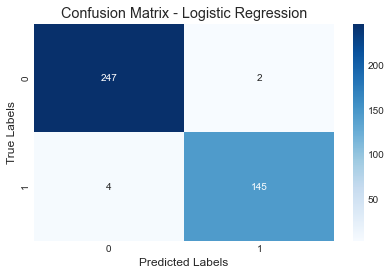

In [136]:
matrix(y_train, log_reg_train_grid, 'Confusion Matrix - Logistic Regression')

In [134]:
log_reg_test_grid = lr_pipe_grid.predict(X_test)

In [135]:
report(y_test, log_reg_test_grid, 'Confusion Matrix - Logistic Regression')

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

Accuracy Score: 0.9766081871345029


AxesSubplot(0.08,0.125;0.696x0.755)


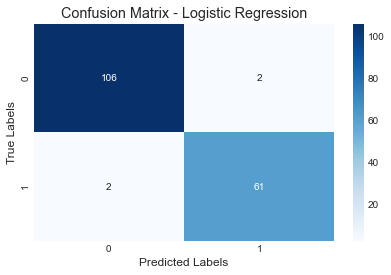

In [137]:
matrix(y_test, log_reg_test_grid, 'Confusion Matrix - Logistic Regression')

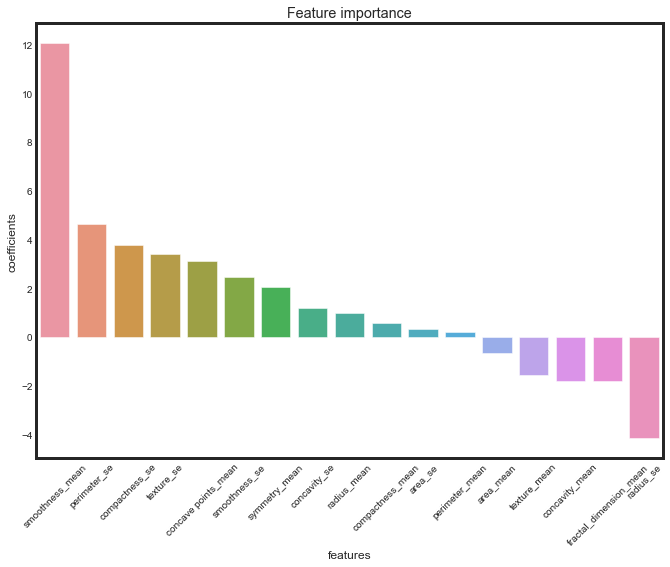

In [138]:
lr_best_pipe = lr_pipe_grid.best_estimator_.named_steps['lr']

#Create Data frame of Regression coefficients
coef= pd.DataFrame(lr_best_pipe.coef_.ravel())
#Merge Regression coefficients with feature names
df_columns = pd.DataFrame(df.drop(['diagnosis'], axis=1).columns)
coef_and_feat = pd.merge(coef,df_columns,left_index= True,right_index= True, how = "left")
coef_and_feat.columns = ["coefficients","features"]
coef_and_feat = coef_and_feat.sort_values(by = "coefficients",ascending = False)

#Set up the matplotlib figure
plt.rcParams['figure.figsize'] = (10,8)
# Let's draw top 10 important features 
sns.barplot(x = 'features', y = 'coefficients', data = coef_and_feat).set_title('Feature importance')
plt.xticks(rotation=45);

In [113]:
tree = DecisionTreeClassifier(random_state=42)

tree_params = {'max_depth': range(1,5), 'max_features': range(3,6), 'criterion': ['gini','entropy']}

tree_grid = GridSearchCV(tree, tree_params, cv=10, scoring='recall')
tree_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 5),
                         'max_features': range(3, 6)},
             scoring='recall')

In [118]:
#Best Parameters
tree_grid.best_params_

{'criterion': 'gini', 'max_depth': 4, 'max_features': 5}

In [116]:
tree_pred_train = tree_grid.predict(X_train)

AxesSubplot(0.08,0.125;0.696x0.755)


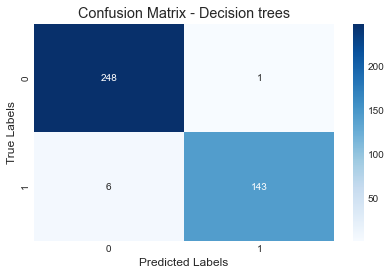

In [120]:
matrix(y_train, tree_pred_train, 'Confusion Matrix - Decision trees')

In [121]:
report(y_train, tree_pred_train, 'Confusion Matrix - Decision trees')

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       249
           1       0.99      0.96      0.98       149

    accuracy                           0.98       398
   macro avg       0.98      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398

Accuracy Score: 0.9824120603015075


In [122]:
tree_pred_test = tree_grid.predict(X_test)

In [123]:
report(y_test, tree_pred_test, 'Confusion Matrix - Decision trees')

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       108
           1       0.92      0.94      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171

Accuracy Score: 0.9473684210526315


AxesSubplot(0.08,0.125;0.696x0.755)


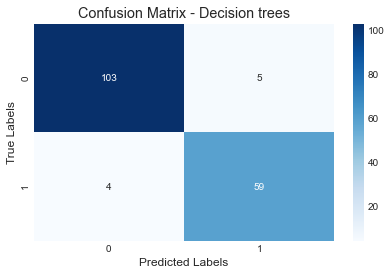

In [124]:
matrix(y_test, tree_pred_test, 'Confusion Matrix - Decision trees')